# Recap on housing dataset

## 1. Importing Libraries

In [1]:
# import libraries.
from pathlib import Path
import tarfile
import urllib.request
import seaborn as sns

import os


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split



In [2]:
# General formating of the notebook.

sns.set_palette('deep')
sns.set_style("whitegrid")

## 2. Import the Data

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets', 'housing')
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    return pd.read_csv("datasets/housing/housing.csv")

housing = fetch_housing_data()

C:\Users\muhum\AppData\Local\Temp\ipykernel_5832\3050473867.py:11: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# inspecting unique values in the 'ocean_proximity' column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 3. Data visualization

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

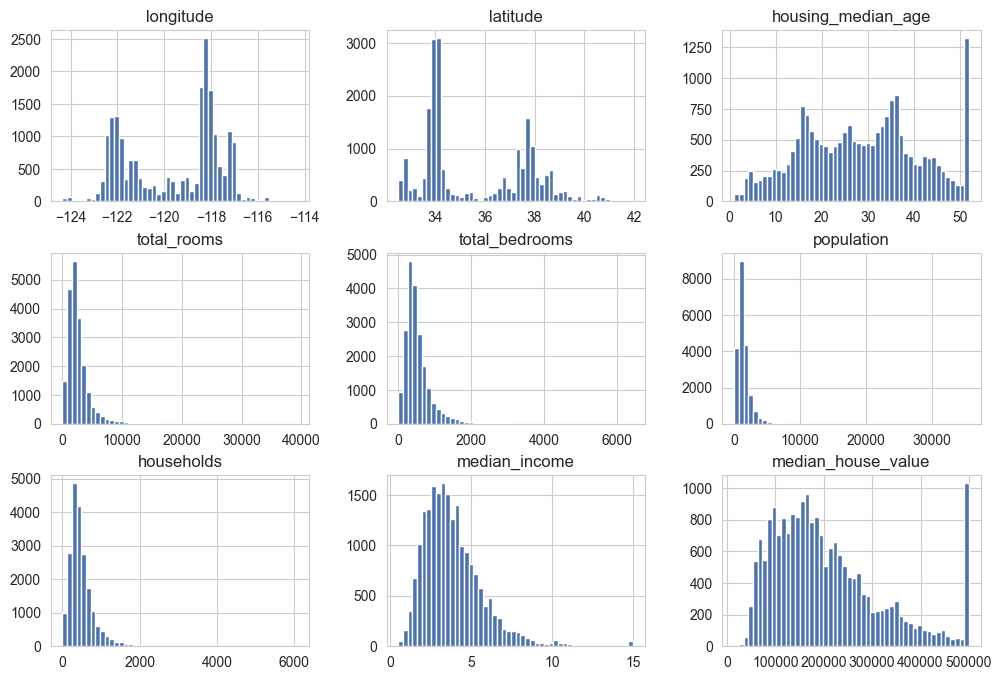

In [8]:
housing.hist(bins=50, figsize=(12,8))

## 4. Create a test set.

The assumption is the dataset is that the `median income` is a great determinant of the value of the `median house value`. As a result, it shall be used to generate stratas before using **stratifed sampling** to come up with the train and test splits.

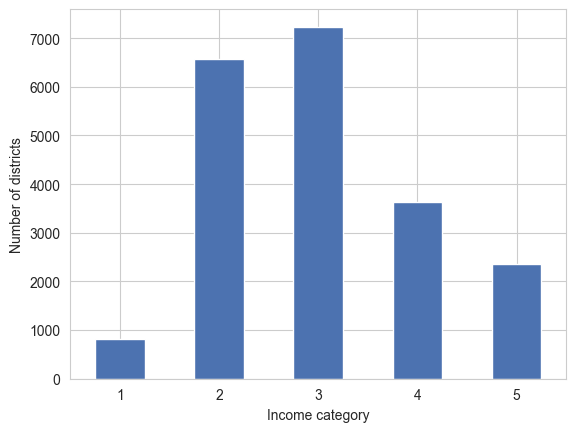

In [9]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0, 1.5, 3.0, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])

housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [10]:
# stratified sampling using the income cat column.
train_set, test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state = 42)

In [11]:
test_set['income_cat'].value_counts() / len(test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
train_set['income_cat'].value_counts() / len(train_set)

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

The ratios seem fine and satisfying. I will just drop the income cat column.


In [13]:
for set_ in (train_set, test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

## 5. Data Visualization

In [14]:
housing = train_set.copy()

Text(0.5, 1.0, 'Geographical scatterplot of the data')

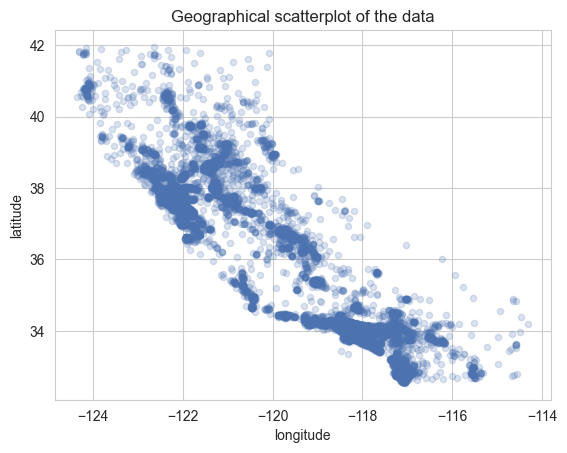

In [15]:
# check the districts.
housing.plot(kind = 'scatter' , x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.title("Geographical scatterplot of the data")

Further visualization. The diameter of the circle represent the population and the color representing the price.

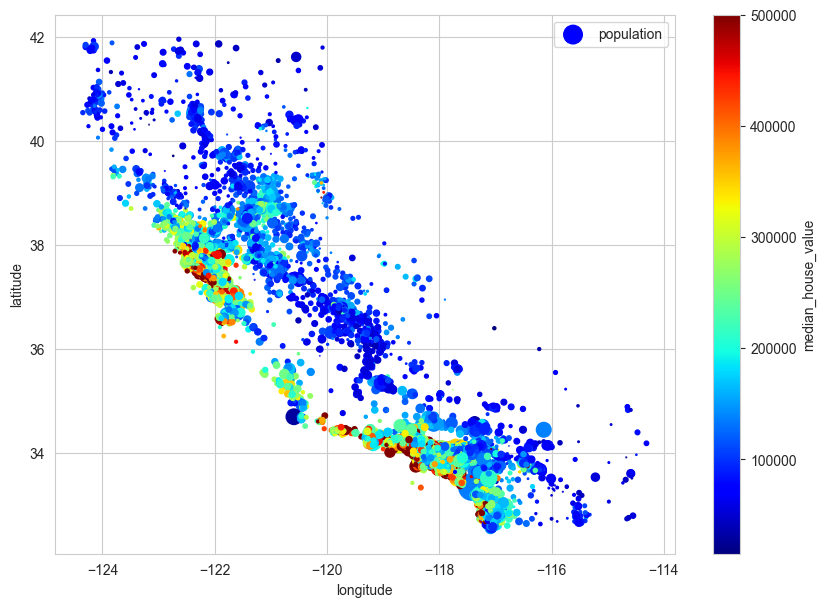

In [16]:
housing.plot(kind= 'scatter', x='longitude', y = 'latitude', grid = True, s=housing['population']/100, label='population',c='median_house_value', cmap='jet', colorbar=True, legend=True, sharex=False, figsize=(10, 7))
plt.show()

Areas with higher population have higher house prices.

In [17]:
print(housing['ocean_proximity'].dtype)

object


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

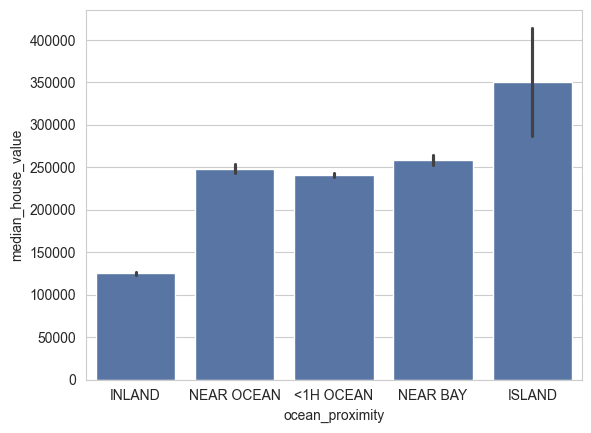

In [18]:
sns.barplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')

<Axes: ylabel='ocean_proximity'>

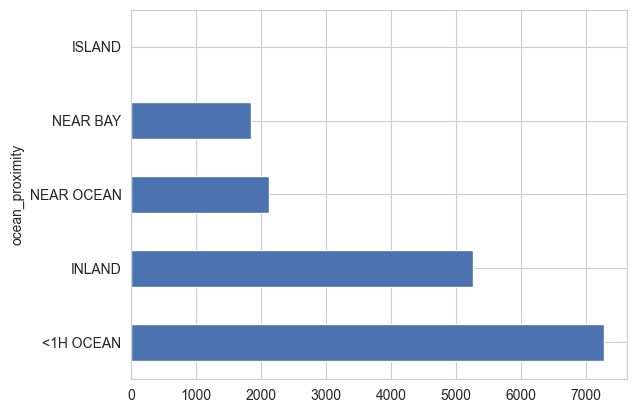

In [19]:
housing['ocean_proximity'].value_counts().plot(kind='barh')

In [20]:
# looking for correlations.
housing.drop('ocean_proximity', axis = 1, inplace=True)
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

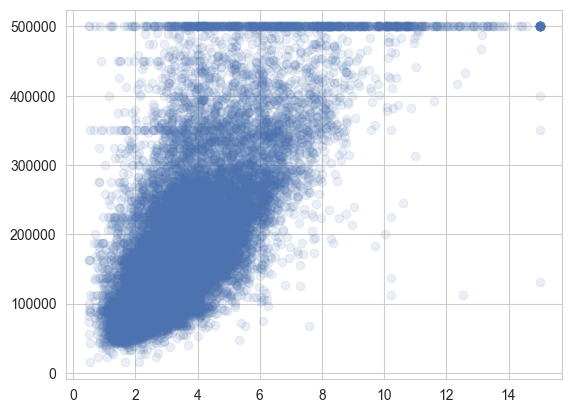

In [21]:
# scatter plot of median income and median house value
plt.scatter(data=housing, x = 'median_income', y = 'median_house_value', alpha=0.1)